## SIMULATION OF VENTILATOR TIRAGE DURING COVID-19 PANDEMIC

Authors: Siddarth Maheshwari, Suguna Menon, Charlie Cao and Elena Lopez Freijo

Date: April 13, 2020. 

### Objective 

In this project, the team explored, through simulation modeling, the different policies of ventilator allocation and examined the optimal quantity of ventilators in stock for three different policies. 

### Steps

#### Scenario analysis
The team conducted scenario analysis using simulation modeling. The three scenarios analyzed are as follows:

    - Policy #1: First Come First Serve (Random)
In this scenario, 100 ventilators are assigned 100 random patients out of the total 170 patients.
As the ventilator assignment is random, the survival will depend on the age group and the survival probability of the patient who comes in first. 

    - Policy #2: Prioritizing based on Age Group (Ascending)
In this scenario, younger patients are given priority for ventilator assignment. The team assumed that all the patients arrive at the same time. In this case, the team sorted the sample data of 170 patients in ascending order of their age group and assign ventilators to the top 100 patients who are the youngest.

    - Policy #3: Prioritizing based on Age Group (Descending)
In this scenario, elder patients are given priority for ventilator assignment. The team assumed that all the patients arrive at the same time. In this case, the team sorted the sample data of 170 patients in descending order of their age group and assign ventilators to the top 100 patients who are the oldest. 

#### Sensitivity analysis of ventilator capacity

After the scenario analysis, the team conducted sensitivity analysis of ventilator capacity (ie optimal number of ventilators).
The sensitivity analysis allows to assess the survival probability of a fixed number of patients that arrives at the hospital for different number of ventilators available. In this case, the number of patients remains the same as in the previous scenarios. However, the number of ventilators is a range between 98 and 120.


### Data set

Sample data of 170 patients, randomly generated based on age distribution of research paper (please refer to Yang, et al., 2020 in references section)
#### Simulation parameters (these numbers can be modified according to the objective of the project)
- patients = 170
- ventilators = 100
- number of simulations= 100000


### References

- Yang, X., Yu, Y., Xu, J., Shu, H., Xia, J., Liu, H., ... Shang, Y. (2020). Clinical course and outcomes of critically ill patients with SARS-CoV-2 pneumonia in Wuhan, China: a single-centered, retrospective, observational study.The Lancet Respiratory Medicine. doi: 10.1016/s2213-2600(20)30079-5

- Robertson-Steel I. (2006). Evolution of triage systems. Emergency medicine journal : EMJ , 23(2), 154–155. https://doi.org/10.1136/emj.2005.030270

- Truog, R. D., Mitchell, C., & Daley, G. Q. (2020). The Toughest Triage — Allocating Ventilators in a Pandemic. New England Journal of Medicine. doi: 10.1056/nejmp2005689

In [1]:
# Import necessary packages

import numpy as np
import pandas as pd
import scipy.stats as stats  # for calculating confidence intervals
import math as math
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
import random
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')
import statistics 

## Data and parameters for the three scenarios

### Model Parameters

In [2]:
patients = 170
ventilators = 100

# Simulation Parameters:
num_simulations= 100000

In [3]:
#Data from research mentioned in the report ("Clinical course and outcomes of critically ill patients )

# Defining patient age categories (4 age groups)
age = ["49 and below", "50-59", "60-69", "70 and above"]

# Defining survival probability by age group. Survival rate at day 28 using the ventilator from the research paper. 
survival_rate = [0.75, 0.3077, 0.3529,0.10]
survival_rate  

#Create a dataframe with research data
data = {'Age': age, 
        'survival_rate': survival_rate}


df = pd.DataFrame(data, index = None) 

df.head(8)


,Age,survival_rate
0,49 and below,0.7500
1,50-59,0.3077
2,60-69,0.3529
3,70 and above,0.1000


## Scenario 1: Ventilators are randomly assign - first come, first serve 

In this scenario, the patients will arrive at the hospital randomly. Ventilators are assigned based on the "first come, first serve" policy. 

In [4]:
#Calculating age distribution of the patients based on research paper

number_byage = [12,13,17,10]
prop_byage = [x/52 for x in number_byage] #52 is total number of patients in the research sample
prop_byage = [round(x,2) for x in prop_byage]
prop_byage


total_survive_lst = []

#Running 10000 simulations
for n in range(num_simulations):
    
    group_age_patient_lst =[]

    #Simulating age group of the patient using random selection with the age distribution previoulsy calculated.
    for i in range (1,patients+1,1):
        group_age_patient = random.choices(
        population = age,
        weights = prop_byage)
        group_age_patient_lst.append(group_age_patient)



    #Calculating survival probability and lambda of each patient based on their age and their survival probability (at day 28)
    time_func=28 #max. days with ventilator
    surv_rate_function_lst =[]
    lambda_patient_lst = []


    for i in range (0, patients,1): #from 0 to the total number of patients. Do not add +1 because the loop starts at 0. 
        if group_age_patient_lst[i] == "49 and below":
            surv_rate_function = round(np.random.triangular(0.01,df.iloc[0,1],0.99),4)
            lambda_patient = round(-(math.log(surv_rate_function)/time_func),4)
        elif group_age_patient_lst[i] == "50-59":
            surv_rate_function = round(np.random.triangular(0.01,df.iloc[1,1],0.99),4)
            lambda_patient = round(-(math.log(surv_rate_function)/time_func),4)
        elif group_age_patient_lst[i] == "60-69":
            surv_rate_function = round(np.random.triangular(0.01,df.iloc[2,1],0.99),4)
            lambda_patient = round(-(math.log(surv_rate_function)/time_func),4)
        else:
            surv_rate_function = round(np.random.triangular(0.01,df.iloc[3,1],0.99),4)
            lambda_patient = round(-(math.log(surv_rate_function)/time_func),4)

        lambda_patient_lst.append(lambda_patient)
        surv_rate_function_lst.append(surv_rate_function)



    #Calculating the number of days a patient needs the ventilator based on their survival curve (formula explained in the report)
    days_in_ventilator_req_lst= []

    for i in range (0, patients,1):
            days_in_ventilator_req = round(28 - (((surv_rate_function_lst[i]*100) -1)/98) * 21,)
            days_in_ventilator_req_lst.append(days_in_ventilator_req)


    #Creating a dataframe with all the information gathered until now
    patient_numb = list(range(1,patients + 1))

    data2 = {'Patient': patient_numb, 
            'Group_age': group_age_patient_lst,
            'Surviva_table': surv_rate_function_lst,
            'lambda_patient':lambda_patient_lst,
            'Days_in_ventilator_req': days_in_ventilator_req_lst}


    df_lambda = pd.DataFrame(data2, index = None)
    

    #Calculating the number of ventilator are being used
    patient_with_ventilator = min(patients, ventilators)
    patient_with_ventilator

    
    #Creating empty dataframe to store information on survival per day
    df_final = pd.DataFrame()
    df_final


    #Computing everyday if a patient survives using a binomial distribution and the survival probability from his survival curve

    for i in range (0, patient_with_ventilator,1):
        person_survive_lst =[]
        survival_at_time_lst = []
        for j in range(1,29): #set to 28 days to keep record of the information in the dataframe (need same length for all the columns)
            if j == 1: #Exception in which the formula of cummulative percentage is not applied because at 0 i do not have a previous survival rate
                survival_at_time_n = math.exp(-(lambda_patient_lst[i] * j))
                person_survive = np.random.binomial(1, survival_at_time_n) #survival at t0
                survival_at_time_lst.append(survival_at_time_n)
                person_survive_lst.append(person_survive)
            else:
                survival_at_time_n_past= math.exp(-(lambda_patient_lst[i] * (j-1)))
                survival_at_time_n = math.exp(-(lambda_patient_lst[i] * j))
                survival_to_check = survival_at_time_n/survival_at_time_n_past #formula to handle cummulative percentages
                person_survive = np.random.binomial(1, survival_to_check)
                survival_at_time_lst.append(survival_to_check)
                person_survive_lst.append(person_survive)

        #Saving information in a dataframw
        df_final.loc[:,i] = person_survive_lst #column indicating whether person survives or not


    patient_no_survive= 0

    #Checking if that person dies while using the ventilator - Computing whether the patient survives from t=1 to the last day they would need the ventilator
    for i in range (0,patient_with_ventilator,1):
        for j in range (0,days_in_ventilator_req_lst[i]): #i only need to check for the time that he uses the ventilation
            if df_final.loc[j,i] == 0:
                patient_no_survive = patient_no_survive +1
                break

    #Calculating how many patients survive

    total_survive= ((patient_with_ventilator -patient_no_survive)/patients)*100
    
    total_survive_lst.append(total_survive)
        


In [5]:
#Average of survival probability in scenario 1 considering all patients 

sum(total_survive_lst)/(len(total_survive_lst))

26.997058823529407

## Scenario 2 - Younger patients are given priority

In this scenario, younger patients (i.e. patients who belongs to the "49 and below" age group are given priority).

In [6]:
#Calculating age distribution of the patients based on research paper

number_byage = [12,13,17,10]
prop_byage = [x/52 for x in number_byage]
prop_byage = [round(x,2) for x in prop_byage]
prop_byage


total_survive_lst = []

#Running 10000 simulations
for n in range(num_simulations):
    
    group_age_patient_lst =[]
    
    #Simulating age group of the patient using random selection with the age distribution previoulsy calculated.
    for i in range (1,patients+1,1):
        group_age_patient = random.choices(
        population = age,
        weights = prop_byage)
        group_age_patient_lst.append(group_age_patient)



    #Calculating survival probability and lambda of each patient based on their age and their survival probability (at day 28)

    time_func=28 #days with ventilator
    surv_rate_function_lst =[]
    lambda_patient_lst = []


    for i in range (0, patients,1): 
        if group_age_patient_lst[i] == "49 and below":
            surv_rate_function = round(np.random.triangular(0.01,df.iloc[0,1],0.99),4)
            lambda_patient = round(-(math.log(surv_rate_function)/time_func),4)
        elif group_age_patient_lst[i] == "50-59":
            surv_rate_function = round(np.random.triangular(0.01,df.iloc[1,1],0.99),4)
            lambda_patient = round(-(math.log(surv_rate_function)/time_func),4)
        elif group_age_patient_lst[i] == "60-69":
            surv_rate_function = round(np.random.triangular(0.01,df.iloc[2,1],0.99),4)
            lambda_patient = round(-(math.log(surv_rate_function)/time_func),4)
        else:
            surv_rate_function = round(np.random.triangular(0.01,df.iloc[3,1],0.99),4)
            lambda_patient = round(-(math.log(surv_rate_function)/time_func),4)

        lambda_patient_lst.append(lambda_patient)
        surv_rate_function_lst.append(surv_rate_function)


    #Calculating the number of days a patient needs the ventilator based on their survival curve (formula explained in the report)
    days_in_ventilator_req_lst= []

    for i in range (0, patients,1):
            days_in_ventilator_req = round(28 - (((surv_rate_function_lst[i]*100) -1)/98) * 21,)
            days_in_ventilator_req_lst.append(days_in_ventilator_req)


    #Creating a df with all the information gathered until now

    patient_numb = list(range(1,patients + 1))

    data2 = {'Patient': patient_numb, 
            'Group_age': group_age_patient_lst,
            'Surviva_table': surv_rate_function_lst,
            'lambda_patient':lambda_patient_lst,
            'Days_in_ventilator_req': days_in_ventilator_req_lst}


    df_lambda = pd.DataFrame(data2, index = None)
    
    
    #Transforming the categorical column 'Group_age' into a numerical one using LabelEncoder
    LE = LabelEncoder()
    df_lambda['code_age'] = LE.fit_transform(group_age_patient_lst)

    
    #Sorting dataframe by age group(column code_age) so the following for loop assigns first ventilators to the younger people

    df_scenario2 = df_lambda.sort_values(by=['code_age'], ascending=True)

    #Reseting index for the for loop

    df_scenario2 = df_scenario2.reset_index(drop=True)


    
    #Calculating the number of ventilators in used
    patient_with_ventilator = min(patients, ventilators)
    patient_with_ventilator

    #Creating empty df to store info

    df_final_2 = pd.DataFrame()


    #Computing everyday if a patient survives using a binomial distribution and the survival probability from his survival curve
    
    for i in range (0, patient_with_ventilator,1):
        person_survive_lst =[]
        survival_at_time_lst = []
        for j in range(1,29): #set to 28 days to have the dataframe (i.e. same length for all the columns)
            if j == 1: 
                survival_at_time_n = math.exp(-(df_scenario2['lambda_patient'].values[i] * j))
                person_survive = np.random.binomial(1, survival_at_time_n) #survival at t0
                survival_at_time_lst.append(survival_at_time_n)
                person_survive_lst.append(person_survive)
            else:
                survival_at_time_n_past= math.exp(-(df_scenario2['lambda_patient'].values[i] * (j-1)))
                survival_at_time_n = math.exp(-(df_scenario2['lambda_patient'].values[i] * j))
                survival_to_check = survival_at_time_n/survival_at_time_n_past #formula to handle cummulative percentages
                person_survive = np.random.binomial(1, survival_to_check)
                survival_at_time_lst.append(survival_to_check)
                person_survive_lst.append(person_survive)

        df_final_2.loc[:,i] = person_survive_lst 


    #Checking if that person dies while using the ventilator - Computing whether the patient survives from t=1 to the last day they would need the ventilator

    patient_no_survive= 0

    
    for i in range (0,patient_with_ventilator,1):
        for j in range (0,df_scenario2['Days_in_ventilator_req'].values[i]): #i only need to check for the time that he uses the ventilation
            if df_final_2.loc[j,i] == 0:
                patient_no_survive = patient_no_survive +1
                break


    #Calculating how many patients survive    
    
    total_survive= ((patient_with_ventilator -patient_no_survive)/patients)*100
    
    total_survive_lst.append(total_survive)

In [7]:
#Average of survival probability in scenario 2 considering all patients 

sum(total_survive_lst)/(len(total_survive_lst))

27.002352941176458

## Scenario 3 - Older patients are given priority

In [8]:
#Calculating age distribution of the patients based on research paper

number_byage = [12,13,17,10]
prop_byage = [x/52 for x in number_byage]
prop_byage = [round(x,2) for x in prop_byage]
prop_byage



total_survive_lst = []

#Running 10000 simulations
for n in range(num_simulations):
    
    
    #Simulating age group of the patient using random selection with the age distribution previoulsy calculated.
    group_age_patient_lst =[]

    for i in range (1,patients+1,1):
        group_age_patient = random.choices(
        population = age,
        weights = prop_byage)
        group_age_patient_lst.append(group_age_patient)



    #Calculating survival probability and lambda of each patient based on their age and their survival probability (at day 28)
    time_func=28 #days with ventilator
    surv_rate_function_lst =[]
    lambda_patient_lst = []


    for i in range (0, patients,1): 
        if group_age_patient_lst[i] == "49 and below":
            surv_rate_function = round(np.random.triangular(0.01,df.iloc[0,1],0.99),4)
            lambda_patient = round(-(math.log(surv_rate_function)/time_func),4)
        elif group_age_patient_lst[i] == "50-59":
            surv_rate_function = round(np.random.triangular(0.01,df.iloc[1,1],0.99),4)
            lambda_patient = round(-(math.log(surv_rate_function)/time_func),4)
        elif group_age_patient_lst[i] == "60-69":
            surv_rate_function = round(np.random.triangular(0.01,df.iloc[2,1],0.99),4)
            lambda_patient = round(-(math.log(surv_rate_function)/time_func),4)
        else:
            surv_rate_function = round(np.random.triangular(0.01,df.iloc[3,1],0.99),4)
            lambda_patient = round(-(math.log(surv_rate_function)/time_func),4)

        lambda_patient_lst.append(lambda_patient)
        surv_rate_function_lst.append(surv_rate_function)




    #Calculating the number of days a patient needs the ventilator based on their survival curve (formula explained in the report)

    days_in_ventilator_req_lst= []

    for i in range (0, patients,1):
            days_in_ventilator_req = round(28 - (((surv_rate_function_lst[i]*100) -1)/98) * 21,)
            days_in_ventilator_req_lst.append(days_in_ventilator_req)


    #Creating a df with all the information gathered until now

    patient_numb = list(range(1,patients + 1))

    data2 = {'Patient': patient_numb, 
            'Group_age': group_age_patient_lst,
            'Surviva_table': surv_rate_function_lst,
            'lambda_patient':lambda_patient_lst,
            'Days_in_ventilator_req': days_in_ventilator_req_lst}


    df_lambda = pd.DataFrame(data2, index = None)
    
    
    #Transforming the categorical column 'Group_age' into a numerical one using LabelEncoder
    LE = LabelEncoder()
    df_lambda['code_age'] = LE.fit_transform(group_age_patient_lst)

    
    #Sorting dataframe by age group(column code_age) so the following for loop assigns first ventilators to the younger people

    df_scenario3 = df_lambda.sort_values(by=['code_age'], ascending=False)

    #Reseting index for the for loop

    df_scenario3 = df_scenario3.reset_index(drop=True)


    
    #Calculating the number of ventilators being used


    patient_with_ventilator = min(patients, ventilators)
    patient_with_ventilator

    #Creating empty df to store info

    df_final_3 = pd.DataFrame()


    #Computing everyday if a patient survives using a binomial distribution and the survival probability from his survival curve    
    for i in range (0, patient_with_ventilator,1):
        person_survive_lst =[]
        survival_at_time_lst = []
        for j in range(1,29): 
            if j == 1:
                survival_at_time_n = math.exp(-(df_scenario3['lambda_patient'].values[i] * j))
                person_survive = np.random.binomial(1, survival_at_time_n) #survival at t0
                survival_at_time_lst.append(survival_at_time_n)
                person_survive_lst.append(person_survive)
            else:
                survival_at_time_n_past= math.exp(-(df_scenario3['lambda_patient'].values[i] * (j-1)))
                survival_at_time_n = math.exp(-(df_scenario3['lambda_patient'].values[i] * j))
                survival_to_check = survival_at_time_n/survival_at_time_n_past #formula to deal with cummulative percentages
                person_survive = np.random.binomial(1, survival_to_check)
                survival_at_time_lst.append(survival_to_check)
                person_survive_lst.append(person_survive)
                            
        df_final_3.loc[:,i] = person_survive_lst 


        
    #Checking if that person dies while using the ventilator - Computing whether the patient survives from t=1 to the last day they would need the ventilator

    patient_no_survive= 0

   
    for i in range (0,patient_with_ventilator,1):
        for j in range (0,df_scenario3['Days_in_ventilator_req'].values[i]): #i only need to check for the time that he uses the ventilation
            if df_final_3.loc[j,i] == 0:
                patient_no_survive = patient_no_survive +1
                break

                
    #Calculating how many patients survive
    
    total_survive= ((patient_with_ventilator -patient_no_survive)/patients)*100
    
    total_survive_lst.append(total_survive)
    
    

In [9]:
#Average of survival probability in scenario 3 considering all patients 

sum(total_survive_lst)/(len(total_survive_lst))

26.79176470588234

## Relevant findings on policy comparison

There are no significant differences amongst the policies. Moving forward, the team hope that this simplified triage simulation model can be the basis of further discussion on the topic of medical resource allocation.

- Policy #1: First Come First Serve (Random)
Based on the sample data of 170 patients, implementing the first come first serve policy gives on an average 26.9971% survivals.

- Policy #2: Prioritizing based on Age Group (Ascending)
Younger patients have higher survival probability. Implementing this policy gives on average a 27.0024% survival. Though the difference between the survivals is not significant, the percentage is higher for policy 2.

- Policy #3: Prioritizing based on Age Group (Descending)
Older patients have relatively less chances of survival. Implementing this policy gives on average 26.7918% survival. Though the difference between the survivals is not significant, the percentage is lowest for this policy.

Intuitively, the above results make sense because the hospitals are prioritizing and assigning ventilators to the patients who have a higher chance of survival as compared to those with lower chances of survival. 

## Sensitivity analysis for number of ventilators


Assessing survival probability based on the number of ventilators when the number of patients is fixed.
Number of ventilators is a range between 98 and 120. 


In [20]:
#Parameters

patients = 170
ventilators = 100


In [21]:
#Calculating age distribution of the patients based on research paper

number_byage = [12,13,17,10]
prop_byage = [x/52 for x in number_byage]
prop_byage = [round(x,2) for x in prop_byage]
prop_byage


#Simulating age group of the patient using random selection with the age distribution previoulsy calculated.

total_survive_lst = []

group_age_patient_lst =[]

for i in range (1,patients+1,1):
    group_age_patient = random.choices(
    population = age,
    weights = prop_byage)
    group_age_patient_lst.append(group_age_patient)



#Calculating survival probability and lambda of each patient based on their age and their survival probability (at day 28)

time_func=28 #days with ventilator
surv_rate_function_lst =[]
lambda_patient_lst = []


for i in range (0, patients,1): #from 0 because 10 is not included and i am using i to extract info from a df
    if group_age_patient_lst[i] == "49 and below":
        surv_rate_function = round(np.random.triangular(0.01,df.iloc[0,1],0.99),4)
        lambda_patient = round(-(math.log(surv_rate_function)/time_func),4)
    elif group_age_patient_lst[i] == "50-59":
        surv_rate_function = round(np.random.triangular(0.01,df.iloc[1,1],0.99),4)
        lambda_patient = round(-(math.log(surv_rate_function)/time_func),4)
    elif group_age_patient_lst[i] == "60-69":
        surv_rate_function = round(np.random.triangular(0.01,df.iloc[2,1],0.99),4)
        lambda_patient = round(-(math.log(surv_rate_function)/time_func),4)
    else:
        surv_rate_function = round(np.random.triangular(0.01,df.iloc[3,1],0.99),4)
        lambda_patient = round(-(math.log(surv_rate_function)/time_func),4)

    lambda_patient_lst.append(lambda_patient)
    surv_rate_function_lst.append(surv_rate_function)



#Calculating the number of days a patient needs the ventilator based on their survival curve (formula explained in the report)

days_in_ventilator_req_lst= []

for i in range (0, patients,1):
        days_in_ventilator_req = round(28 - (((surv_rate_function_lst[i]*100) -1)/98) * 21,)
        days_in_ventilator_req_lst.append(days_in_ventilator_req)


#Creating df with all the information gathered until now

patient_numb = list(range(1,patients + 1))

data2 = {'Patient': patient_numb, 
        'Group_age': group_age_patient_lst,
        'Surviva_table': surv_rate_function_lst,
        'lambda_patient':lambda_patient_lst,
        'Days_in_ventilator_req': days_in_ventilator_req_lst}


df_lambda = pd.DataFrame(data2, index = None)



#Running 10000 simulations

for n in range(num_simulations):
    
    for ventilators in range(98,120): #range of ventilators assessed in the sensitivity analysis
    
        #Number of ventilators used
        patient_with_ventilator = min(patients, ventilators)
        patient_with_ventilator

        #Creating empty df to store info

        df_final = pd.DataFrame()
        df_final


        #Computing everyday if a patient survives using a binomial distribution and the survival probability from his survival curve    

        for i in range (0, patient_with_ventilator,1):
            person_survive_lst =[]
            survival_at_time_lst = []
            for j in range(1,29):
                if j == 1: 
                    survival_at_time_n = math.exp(-(lambda_patient_lst[i] * j))
                    person_survive = np.random.binomial(1, survival_at_time_n) #survival at t0
                    survival_at_time_lst.append(survival_at_time_n)
                    person_survive_lst.append(person_survive)
                else:
                    survival_at_time_n_past= math.exp(-(lambda_patient_lst[i] * (j-1)))
                    survival_at_time_n = math.exp(-(lambda_patient_lst[i] * j))
                    survival_to_check = survival_at_time_n/survival_at_time_n_past #formula to deal with cummulative percentages
                    person_survive = np.random.binomial(1, survival_to_check)
                    survival_at_time_lst.append(survival_to_check)
                    person_survive_lst.append(person_survive)

            df_final.loc[:,i] = person_survive_lst 


        #Checking if that person dies while using the ventilator - Computing whether the patient survives from t=1 to the last day they would need the ventilator

        patient_no_survive= 0


        for i in range (0,patient_with_ventilator,1):
            for j in range (0,days_in_ventilator_req_lst[i]): #i only need to check for the time that he uses the ventilation
                if df_final.loc[j,i] == 0:
                    patient_no_survive = patient_no_survive +1
                    break

        #Calculating how many patients survived 

        total_survive= ((patient_with_ventilator -patient_no_survive)/patients)*100
        
        total_survive_lst.append([ventilators,total_survive])
        
    


<Figure size 1152x432 with 0 Axes>

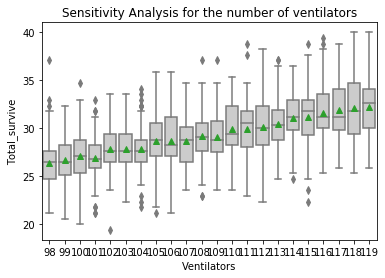

<Figure size 1152x432 with 0 Axes>

In [23]:
#Creating data frame to plot the boxplot to visualize results

df_decisions = pd.DataFrame(total_survive_lst, columns=["Ventilators","Total_survive"])
sns.boxplot(x="Ventilators", y="Total_survive", color=".8", showmeans=True, data=df_decisions).set_title("Sensitivity Analysis for the number of ventilators")
plt.figure(figsize=(16, 6))

The graph above illustrates the average survival probability along with a significant number of outliers.

### 95% Confidence intervals 

In [24]:
#Calculating confidence intervals 

decision_average = []
decision_lower = []
decision_upper = []

ventilators_list = range(98,120)
num_reps= num_simulations


for d in ventilators_list:
    profit_d = df_decisions[df_decisions['Ventilators']==d]['Total_survive']
    avg_d = np.average(profit_d)
    
    decision_average.append(avg_d)
    
    stddev_d = np.std(profit_d, ddof=1)
    stderror_d  = stddev_d/math.sqrt(num_reps)
    tCrit_d = stats.t.ppf(q=0.975, df=num_reps-1) #95% confidence
    lower95CI_d = avg_d - tCrit_d*stderror_d
    upper95CI_d = avg_d + tCrit_d*stderror_d
    
    decision_lower.append(lower95CI_d)
    decision_upper.append(upper95CI_d)
    
df_CI = pd.DataFrame(list(zip(ventilators_list, 
                                      decision_lower, 
                                      decision_average, 
                                      decision_upper)), 
                             columns = ['Ventilators', 
                                        "Lower", 
                                        "Mean", 
                                        "Upper"])

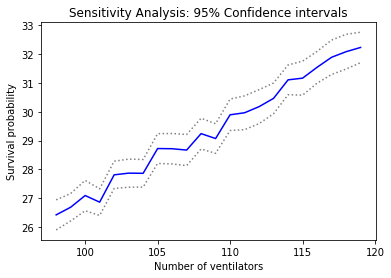

In [25]:
#Visualize results in a plot with upper and lower intervals

plt.plot(df_CI["Ventilators"], df_CI["Mean"], label="Mean", color = "blue")
plt.plot(df_CI["Ventilators"], df_CI["Lower"], label="Lower Bound", linestyle=":", color = "gray")
plt.plot(df_CI["Ventilators"], df_CI["Upper"], label="Upper Bound", linestyle=":", color = "gray")

plt.ylabel('Survival probability')
plt.xlabel('Number of ventilators')
plt.title('Sensitivity Analysis: 95% Confidence intervals')
plt.show()


It can be concluded that with 95% confidence that the expected survival probability for each number of ventilator varies between a range of 0.03%.

### Relevant findings on sensitivity analysis

The results from the sensitivity analysis shows how the average survival probability increases as the number of ventilators available in the hospital increases. The relationship is almost linear as the probability increases gradually, showing the positive effect of an additional ventilator. One additional ventilator increases the average probability of survival by an average of about 0.2% with a standard deviation of about 0.7%.


## Addition: Sensitivity analysis for number of patients

Assessing survival probability based on the random number of patients that can arrive at the hospital. In this case, the number of ventilators is fixed at 80. 
Random number of patients between 80 and 200. 

In [11]:
#Generating a random number of patients using a random.sample between 80 and 200

numb_patients_rand = random.sample(range(80, 200), 50)

ventilators = 80

#Calculating age distribution of the patients based on research paper

number_byage = [12,13,17,10]
prop_byage = [x/52 for x in number_byage]
prop_byage = [round(x,2) for x in prop_byage]
prop_byage



total_survive_lst = []

#Running 10000 simulations
for rep in range(num_simulations):

    #for the 50 samples of number of patients
    for patients in numb_patients_rand:


        group_age_patient_lst =[]

        for i in range (1,patients+1,1):
            group_age_patient = random.choices(
            population = age,
            weights = prop_byage)
            group_age_patient_lst.append(group_age_patient)



        time_func=28 #days with ventilator
        surv_rate_function_lst =[]
        lambda_patient_lst = []


        for i in range (0, patients,1): 
            if group_age_patient_lst[i] == "49 and below":
                surv_rate_function = round(np.random.triangular(0.01,df.iloc[0,1],0.99),4)
                lambda_patient = round(-(math.log(surv_rate_function)/time_func),4)
            elif group_age_patient_lst[i] == "50-59":
                surv_rate_function = round(np.random.triangular(0.01,df.iloc[1,1],0.99),4)
                lambda_patient = round(-(math.log(surv_rate_function)/time_func),4)
            elif group_age_patient_lst[i] == "60-69":
                surv_rate_function = round(np.random.triangular(0.01,df.iloc[2,1],0.99),4)
                lambda_patient = round(-(math.log(surv_rate_function)/time_func),4)
            else:
                surv_rate_function = round(np.random.triangular(0.01,df.iloc[3,1],0.99),4)
                lambda_patient = round(-(math.log(surv_rate_function)/time_func),4)

            lambda_patient_lst.append(lambda_patient)
            surv_rate_function_lst.append(surv_rate_function)



        days_in_ventilator_req_lst= []

        for i in range (0, patients,1):
                days_in_ventilator_req = round(28 - (((surv_rate_function_lst[i]*100) -1)/98) * 21,)
                days_in_ventilator_req_lst.append(days_in_ventilator_req)



        patient_numb = list(range(1,patients + 1))

        data2 = {'Patient': patient_numb, 
                'Group_age': group_age_patient_lst,
                'Surviva_table': surv_rate_function_lst,
                'lambda_patient':lambda_patient_lst,
                'Days_in_ventilator_req': days_in_ventilator_req_lst}


        df_lambda = pd.DataFrame(data2, index = None)


        patient_with_ventilator = min(patients, ventilators)
        patient_with_ventilator

       
        df_final = pd.DataFrame()
        df_final


        for i in range (0, patient_with_ventilator,1):
            person_survive_lst =[]
            survival_at_time_lst = []
            for j in range(1,29): #set to 28 days to have the dataframe (need same length for all the columns)
                if j == 1: #apply the formula of the cummulative percentage, but at 0 i do not have a previous survival rate
                    survival_at_time_n = math.exp(-(lambda_patient_lst[i] * j))
                    person_survive = np.random.binomial(1, survival_at_time_n) #survival at t0
                    survival_at_time_lst.append(survival_at_time_n)
                    person_survive_lst.append(person_survive)
                else:
                    survival_at_time_n_past= math.exp(-(lambda_patient_lst[i] * (j-1)))
                    survival_at_time_n = math.exp(-(lambda_patient_lst[i] * j))
                    survival_to_check = survival_at_time_n/survival_at_time_n_past #formula to deal with cummulative percentages
                    person_survive = np.random.binomial(1, survival_to_check)
                    survival_at_time_lst.append(survival_to_check)
                    person_survive_lst.append(person_survive)

            df_final.loc[:,i] = person_survive_lst 


        patient_no_survive= 0

       

        for i in range (0,patient_with_ventilator,1):
            for j in range (0,days_in_ventilator_req_lst[i]): 
                if df_final.loc[j,i] == 0:
                    patient_no_survive = patient_no_survive +1
                    break


        total_survive= ((patient_with_ventilator -patient_no_survive)/patients)*100

        total_survive_lst.append([patients,total_survive])
        
        



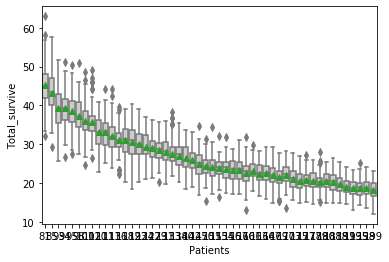

In [12]:
#Creating a dataframe with data from the simulations (number of patients and the probability of survival with 80 ventilators)

df_decisions_2 = pd.DataFrame(total_survive_lst, columns=["Patients","Total_survive"])
sns.boxplot(x="Patients", y="Total_survive", color=".8", showmeans=True, data=df_decisions_2)

The relationship between the number of patients and survival probability is almost linear but it decreases with increasing number of patients.

### 95% Confidence intervals for number of patients

In [13]:
#Calculating 95% confidence intervals

decision_average = []
decision_lower = []
decision_upper = []

num_reps= num_simulations


for d in numb_patients_rand:
    profit_d = df_decisions_2[df_decisions_2['Patients']==d]['Total_survive']
    avg_d = np.average(profit_d)
    
    decision_average.append(avg_d)
    
    stddev_d = np.std(profit_d, ddof=1)
    stderror_d  = stddev_d/math.sqrt(num_reps)
    tCrit_d = stats.t.ppf(q=0.975, df=num_reps-1)
    lower95CI_d = avg_d - tCrit_d*stderror_d
    upper95CI_d = avg_d + tCrit_d*stderror_d
    
    decision_lower.append(lower95CI_d)
    decision_upper.append(upper95CI_d)
    
df_CI = pd.DataFrame(list(zip(numb_patients_rand, 
                                      decision_lower, 
                                      decision_average, 
                                      decision_upper)), 
                             columns = ['Patients', 
                                        "Lower", 
                                        "Mean", 
                                        "Upper"])

In [14]:
df_CI_sort = df_CI.sort_values(by=['Patients'], ascending=True)


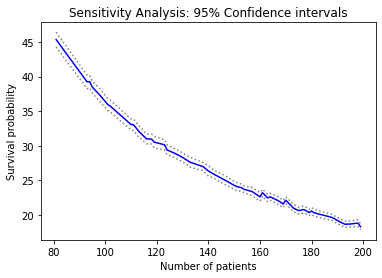

In [15]:
#visualizing plot with confidence intervals 

plt.plot(df_CI_sort["Patients"], df_CI_sort["Mean"], label="Mean", color = "blue")
plt.plot(df_CI_sort["Patients"], df_CI_sort["Lower"], label="Lower Bound", linestyle=":", color = "gray")
plt.plot(df_CI_sort["Patients"], df_CI_sort["Upper"], label="Upper Bound", linestyle=":", color = "gray")

plt.ylabel('Survival probability')
plt.xlabel('Number of patients')
plt.title('Sensitivity Analysis: 95% Confidence intervals')
plt.show()


## Final insights and recommendations on model improvement

### Final insights 
- 1. Even though the difference is not highly significant, by comparing policy #2 and #3, we can see that it would be better to prioritize younger people than elderlies.
- 2. The survival probability of the patients increases gradually as the number of ventilators increases. An additional ventilator might increase the probability by about 0.2%. This raise can make a huge difference when the number of patients that needs a ventilator is high.

Please note that the recommendations made using the results from the model may not be valid for the real life scenario. This represents a simplified simulation with limited number of data and information. 

### Recommendations

- 1. The model does not take into account the new patients who would come in and the patients who recover and leave every day. As a next step, the team could include these numbers to make the model adaptable to real life scenarios.
- 2. There is no reassignment of ventilators in the model, even though the team collected information on the length of ventilator usage for each patient. This part could be added in a future update of the model, which would likely increase the number of survival.